# Implementing Linear Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Know your data

In [2]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)

X = data.data
y = data.target

data = pd.concat([X, y], axis=1)

In [3]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
## shape of the data
data.shape

(20640, 9)

In [5]:
## columns of the data
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

* MedInc: Median income of households in the block group (measured in tens of thousands of dollars).

* HouseAge: Median age of the houses in the area.

* AveRooms: Average number of rooms per household.

* AveBedrms: Average number of bedrooms per household.

* Population: Total population in the block group.

* AveOccup: Average number of occupants per household.

* Latitude: Geographic latitude of the block group (helps identify the north-south positioning).

* Longitude: Geographic longitude (used with latitude to map locations).

* MedHouseVal: Median house value in the block group (in hundreds of thousands of dollars).

In [6]:
## Displaying the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
## Displaying the data description
data.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [8]:
## missing values
data.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [9]:
## duplicates 
data.duplicated().sum()

0

## Data Visualization

### Chart - 1

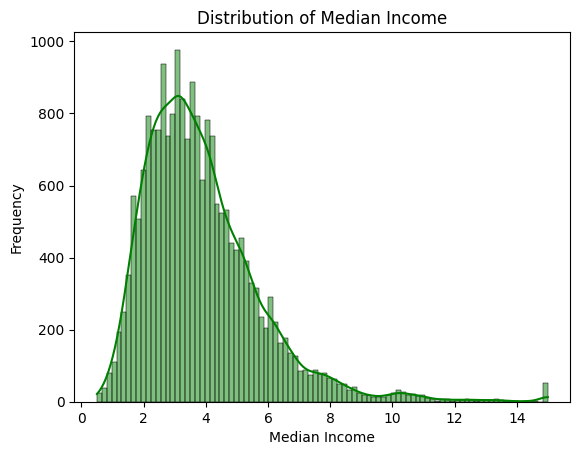

In [10]:
sns.histplot(data['MedInc'], kde=True,color='green')
plt.title('Distribution of Median Income')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.show()

* The distribution of median income is right-skewed, with most values concentrated at the lower end and a long tail extending towards higher incomes, plus a small peak at the maximum.

### Chart - 2

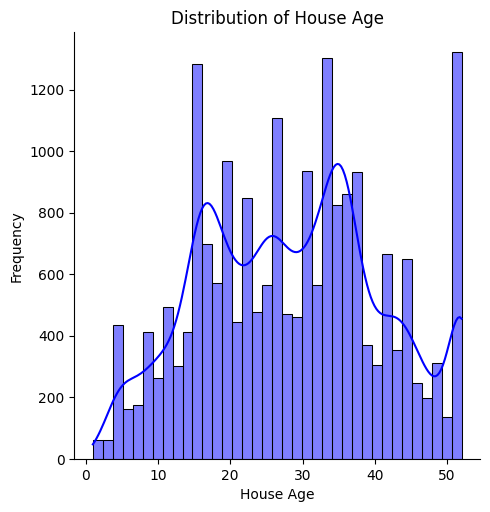

In [11]:
sns.displot(data['HouseAge'], kde=True, color='blue')
plt.title('Distribution of House Age')
plt.xlabel('House Age')
plt.ylabel('Frequency')
plt.show()

### Insights:
* The house age distribution is multi-modal with peaks around 15, 30-35, and 50 years, showing irregular construction periods.

### Chart - 3

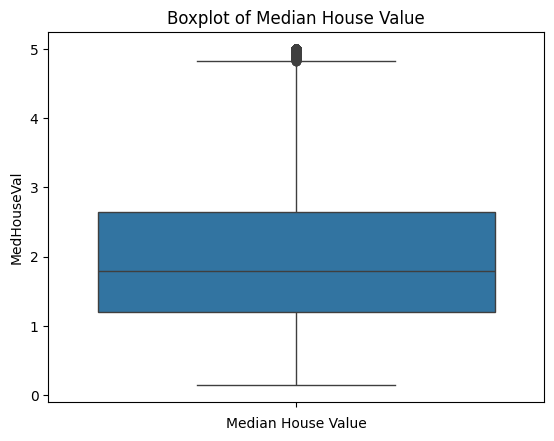

In [12]:
sns.boxplot(data['MedHouseVal'])
plt.title('Boxplot of Median House Value')
plt.xlabel('Median House Value')
plt.show()

### Insights:
* The median house value distribution is right-skewed, with most values concentrated at the lower end, and notable outliers at the very high end.

### Chart - 4

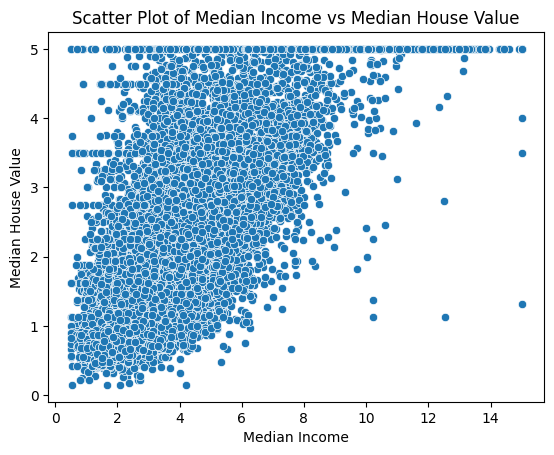

In [13]:
sns.scatterplot(x='MedInc',y='MedHouseVal',data=data)
plt.title('Scatter Plot of Median Income vs Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

### Insights:

* The scatter plot reveals a strong positive correlation between median income and median house value, with house values tending to increase with income. 

* A notable observation is the capping of median house values at a maximum level, regardless of further increases in median income.

### Chart - 5

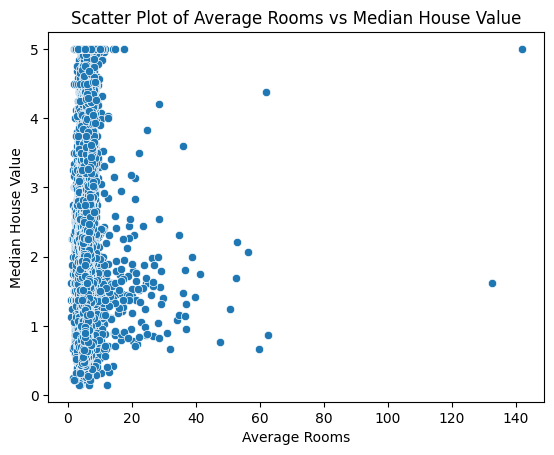

In [14]:
sns.scatterplot(x='AveRooms', y='MedHouseVal', data=data)
plt.title('Scatter Plot of Average Rooms vs Median House Value')
plt.xlabel('Average Rooms')
plt.ylabel('Median House Value')
plt.show()

### Insights:

* The scatter plot shows **no strong linear correlation** between average rooms and median house value. Most data points are clustered at **lower room counts**, often with the **median house value capped** at its maximum. 

* Higher room counts are **sparse and don't show a consistent trend**, with some outliers.

### Chart - 6

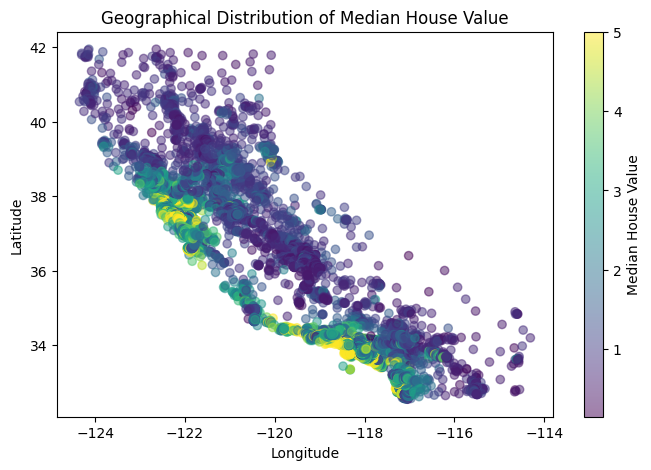

In [15]:
plt.figure(figsize=(8, 5))
plt.scatter(data['Longitude'], data['Latitude'], c=data['MedHouseVal'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Median House Value')
plt.show()

### Insights:

* Higher median house values are predominantly concentrated in the coastal regions, particularly along the southwestern coast. As you move inland and north, median house values generally tend to be lower, indicating strong geographical influence.


### Chart - 7

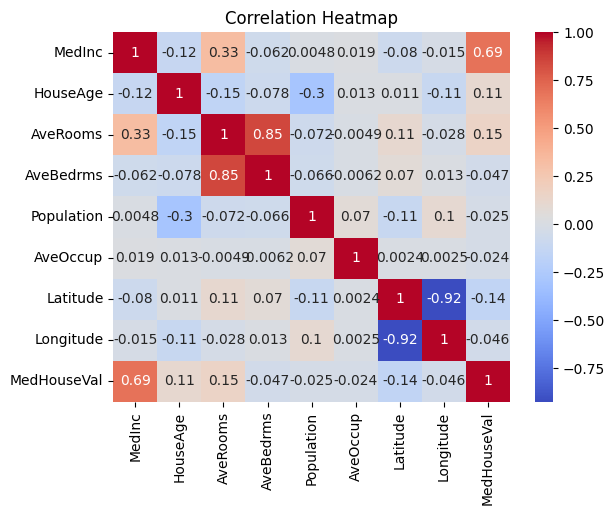

In [16]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Insights:

* The heatmap shows strongest positive correlations for MedInc with MedHouseVal, and AveRooms with AveBedrms. Latitude and Longitude are highly negatively correlated. Most other correlations are weak.

## Visualizing Outliers

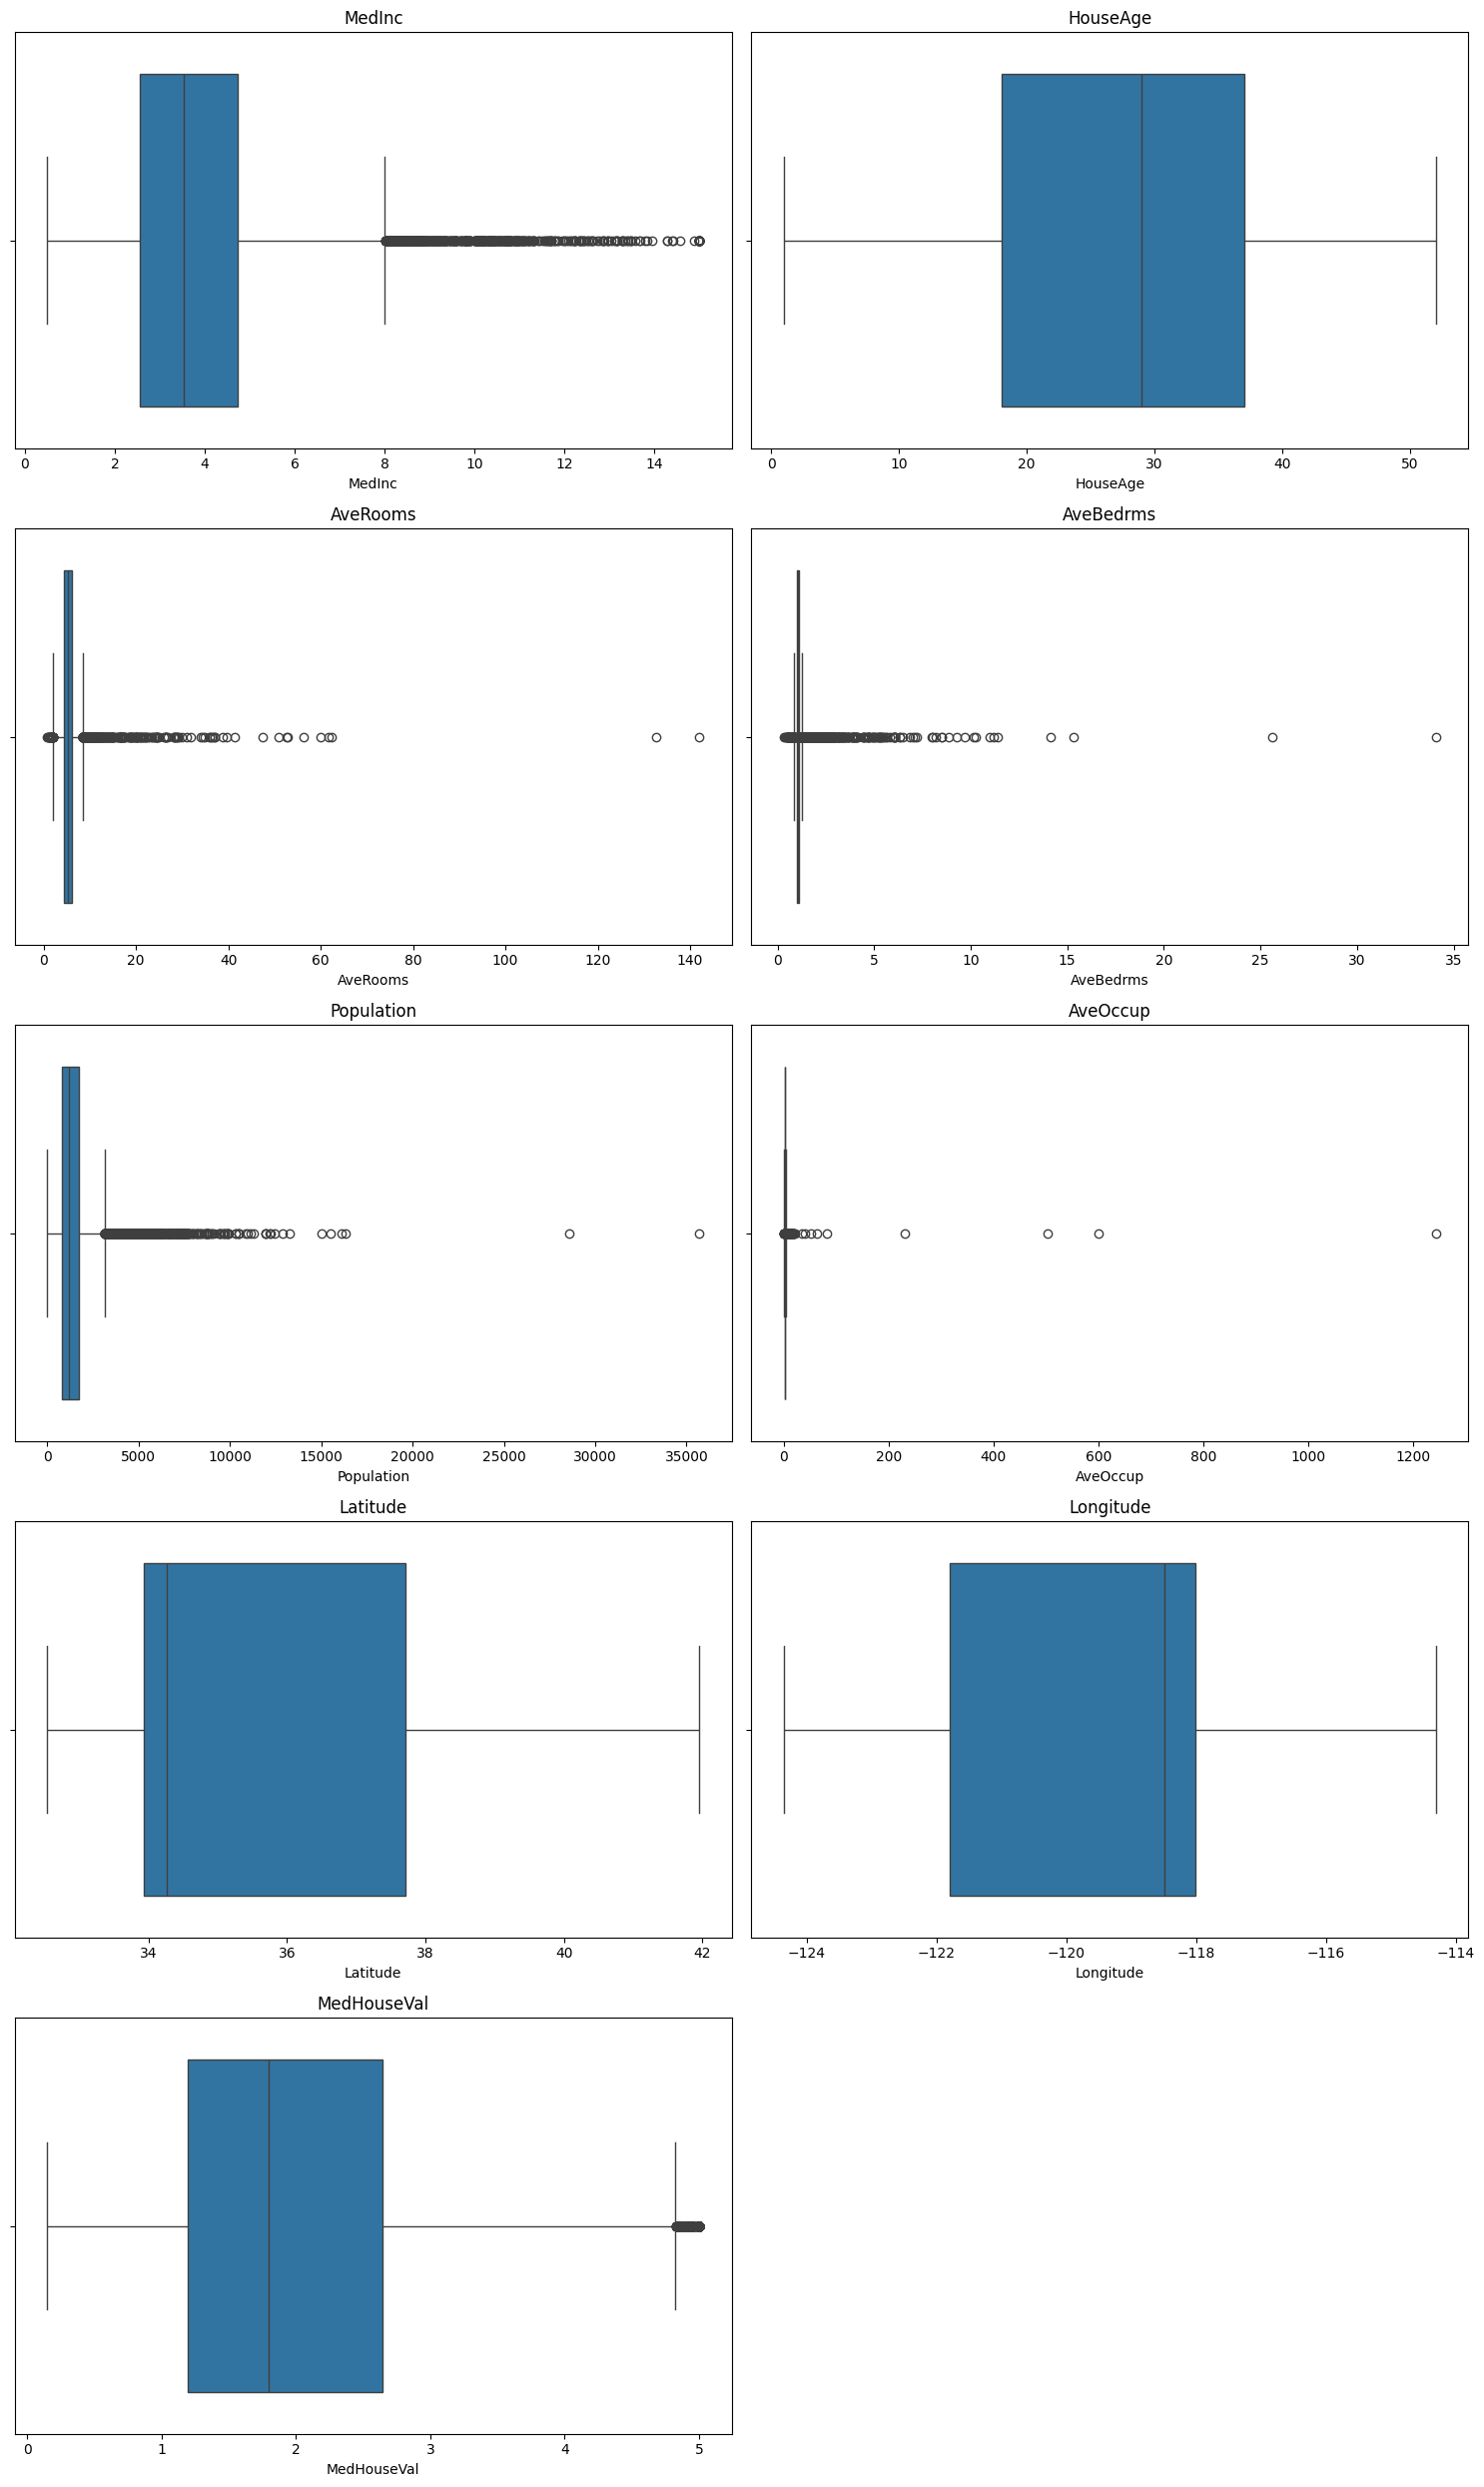

In [17]:
cols = data.columns
n_cols = 2
n_rows = (len(cols) + 1) // n_cols  # Ensures enough rows

plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()


* we can see the outliers only in columns Median Income, Avg rooms, Avg Bed Rooms, Population, Avg Occupants, Median House Value.

* we use winsorization technique to handle these outliers.

## Handling Outliers

In [18]:
def winsorized(data):

    winsorized_data = data.copy()
    outlier_columns = ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal']

    for col in outlier_columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        before = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()

        winsorized_data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

        after = ((winsorized_data[col] < lower_bound) | (winsorized_data[col] > upper_bound)).sum()

        print(f"Column: {col}, Outliers before winsorization: {before}, Outliers after winsorization: {after}")

    

In [19]:
winsorized(data)

Column: MedInc, Outliers before winsorization: 681, Outliers after winsorization: 0
Column: AveRooms, Outliers before winsorization: 511, Outliers after winsorization: 0
Column: AveBedrms, Outliers before winsorization: 1424, Outliers after winsorization: 0
Column: Population, Outliers before winsorization: 1196, Outliers after winsorization: 0
Column: AveOccup, Outliers before winsorization: 711, Outliers after winsorization: 0
Column: MedHouseVal, Outliers before winsorization: 1071, Outliers after winsorization: 0


* so we can see that the winsorization is applied successfully to all the outlier columns and outliers has been handled well

### Splitting the data

In [20]:
from sklearn.model_selection import train_test_split

X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (16512, 8)
Test set shape: (4128, 8)


## Standardization

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Building

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.5332001304956566
Mean Squared Error: 0.5558915986952443
R-squared: 0.5757877060324508


### Interpretation of Evaluation Metrics for Linear Regression Model:

**Mean Absolute Error (MAE):** 0.533
* → On average, the predicted house value is off by 0.533 (in 100,000s of dollars),
   i.e., approx $53,300 — a moderate error for house pricing.

 **Mean Squared Error (MSE):** 0.556
* → Penalizes larger errors more than MAE. Indicates moderate spread in error values.

**R-squared (R²):** 0.575
* The model explains about 57.5% of the variance in house prices.
*   Not great, but acceptable as a baseline — there's room for improvement(e.g., by feature engineering, nonlinear models, or ensemble methods).


In [23]:
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

Coefficients: [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]
Intercept: 2.0719469373788777


### Interpretation of Linear Regression Coefficients:
* Each coefficient represents the expected change in the target variable (MedHouseVal)


  **Coefficients:**
* MedInc        → +0.854  → Strongest positive impact; higher income significantly increases house value.
* HouseAge      → +0.123  → Slightly older houses are associated with higher value.
* AveRooms      → -0.294  → More rooms per household slightly decrease house value.
* AveBedrms     → +0.339  → More bedrooms increase house value.
* Population    → -0.002  → Negligible negative effect; higher population slightly lowers house value.
* AveOccup      → -0.041  → More people per household lowers house value slightly.
* Latitude      → -0.897  → Houses located farther north are worth less.
* Longitude     → -0.870  → Houses located farther west are worth less.

  **Intercept:**
* 2.07 → Predicted median house value (in standardized units) when all feature values are at their means 

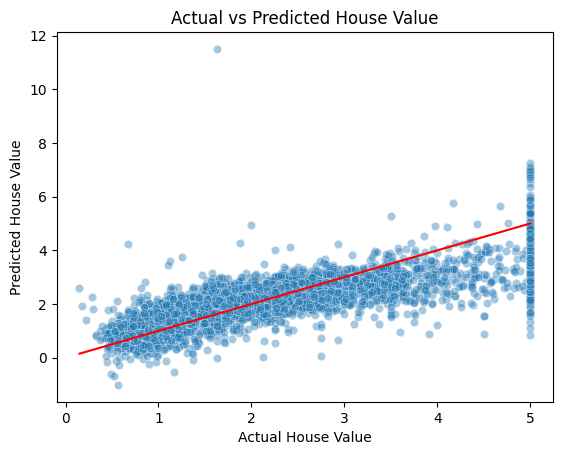

In [24]:
# Assuming we have: y_test (true values), y_pred (predicted by model)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Ideal line
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Actual vs Predicted House Value")
plt.show()
